- MNIST 60,000 images for training set and 10,000 images fro testing set.
- the digits are size-normalized and centered in a fixed-size image(28*28)
- the output layer will have 10 unites/ neurons layers for the digits.
- the input layer will have 28*28/784 units 

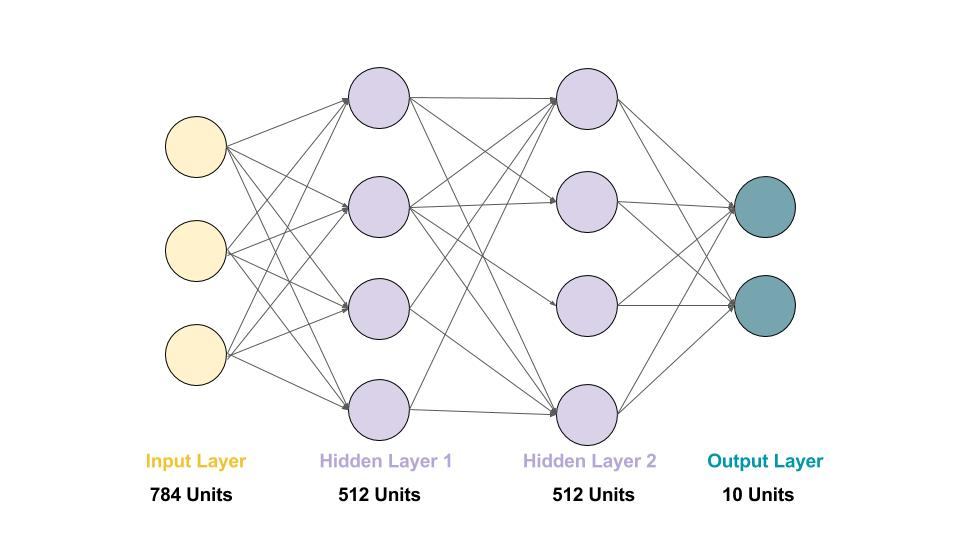

***


In [1]:
# load the data 
# It has a function mnist.load_data() 
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


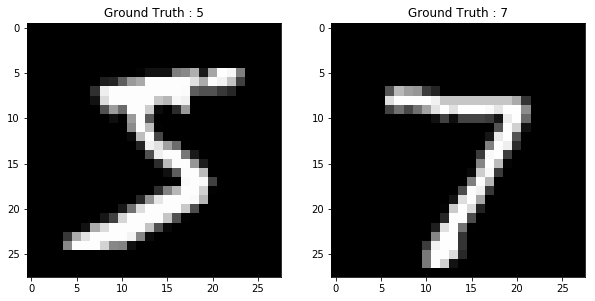

In [2]:
# check out the datasets.
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

# plot
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

plt.show()

In [3]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
# np.prod()
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [4]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [5]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]



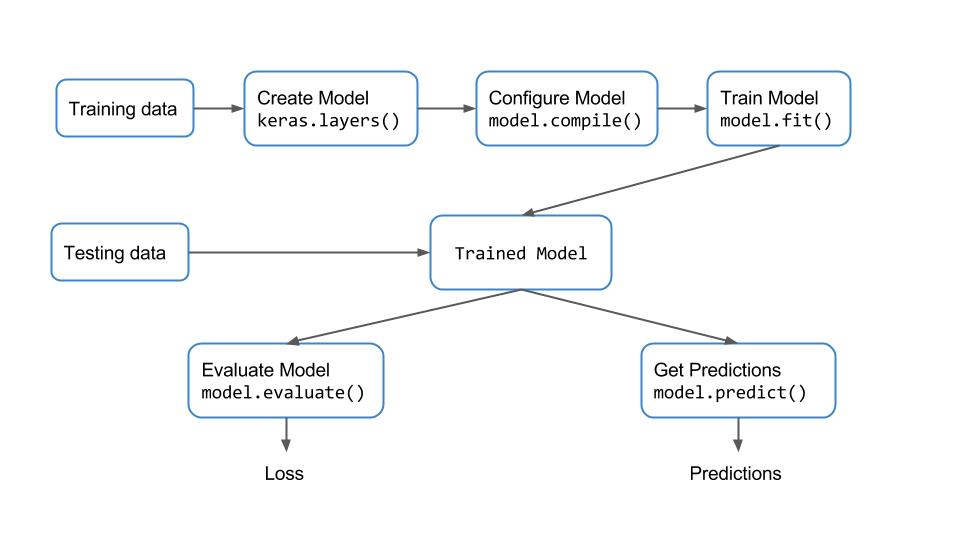


In [6]:
# build model 
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [7]:
# callback
from keras.callbacks import TensorBoard
logger=TensorBoard(log_dir='digit_train/logs_digit_20', histogram_freq=0, batch_size=256, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

Instructions for updating:
Use the retry module or similar alternatives.


In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot),callbacks=[logger])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.2692 - acc: 0.9170 - val_loss: 0.1153 - val_acc: 0.9626
Epoch 2/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0928 - acc: 0.9706 - val_loss: 0.0801 - val_acc: 0.9738
Epoch 3/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0590 - acc: 0.9815 - val_loss: 0.0966 - val_acc: 0.9712
Epoch 4/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0411 - acc: 0.9872 - val_loss: 0.0770 - val_acc: 0.9773
Epoch 5/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.0293 - acc: 0.9903 - val_loss: 0.0760 - val_acc: 0.9794
Epoch 6/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.0212 - acc: 0.9932 - val_loss: 0.0809 - val_acc: 0.9788
Epoch 7/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0184 - acc: 0.9938 - val_loss: 0.0972 - 

In [38]:
# get predicted class
y_prob=model.predict(test_data)
y_classes=y_prob.argmax(axis=-1)
y_prob.shape

(10000, 10)

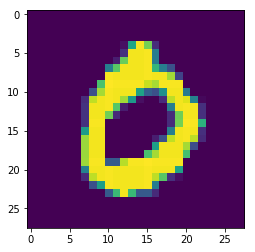

In [36]:
plt.imshow(test_images[3,:,:])
plt.show()

In [ ]:
predicted_label[0]

In [ ]:
test

In [42]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 121us/step
Evaluation result on Test Data : Loss = 0.12168248221392641, accuracy = 0.9819


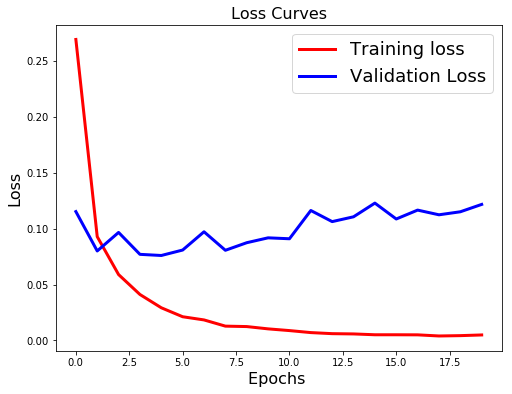

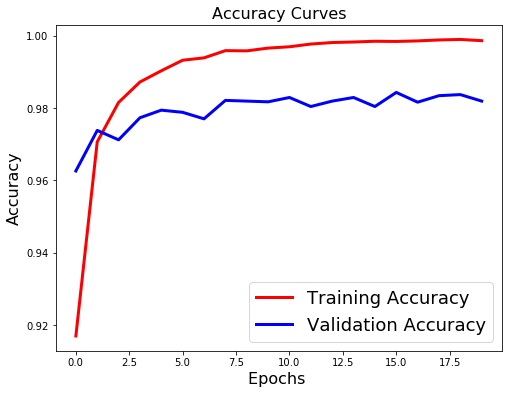

In [41]:
# check for overfitting 
# use history.history.keys() function to check
# what metrics are present in the history.
# normally, it should look like the following
#[ 'acc','loss','val_acc','val_loss']
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()